### 维纳滤波
+ Task.1 信噪比未知
+ Task.2 信噪比已知
+ Task.3 信号和噪声自相关函数已知

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft
from scipy.signal import wiener
import math
import cv2

In [32]:
# 仿真运动模糊
def motion_process(image_size,motion_angle):
 PSF = np.zeros(image_size)
 print(image_size)
 center_position=(image_size[0]-1)/2
 print(center_position)
  
 slope_tan=math.tan(motion_angle*math.pi/180)
 slope_cot=1/slope_tan
 if slope_tan<=1:
  for i in range(15):
   offset=round(i*slope_tan) #((center_position-i)*slope_tan)
   PSF[int(center_position+offset),int(center_position-offset)]=1
  return PSF / PSF.sum() #对点扩散函数进行归一化亮度
 else:
  for i in range(15):
   offset=round(i*slope_cot)
   PSF[int(center_position-offset),int(center_position+offset)]=1
  return PSF / PSF.sum()

In [33]:
#对图片进行运动模糊
def make_blurred(input, PSF, eps):
 input_fft = fft.fft2(input)# 进行二维数组的傅里叶变换
 PSF_fft = fft.fft2(PSF)+ eps
 blurred = fft.ifft2(input_fft * PSF_fft)
 blurred = np.abs(fft.fftshift(blurred))
 return blurred

In [34]:
def inverse(input, PSF, eps):  # 逆滤波
 input_fft = fft.fft2(input)
 PSF_fft = fft.fft2(PSF) + eps #噪声功率，这是已知的，考虑epsilon
 result = fft.ifft2(input_fft / PSF_fft) #计算F(u,v)的傅里叶反变换
 result = np.abs(fft.fftshift(result))
 return result

In [35]:
def _wiener(input,PSF,eps,K=0.01):  #维纳滤波，K=0.01
 input_fft=fft.fft2(input)
 PSF_fft=fft.fft2(PSF) +eps
 PSF_fft_1=np.conj(PSF_fft) /(np.abs(PSF_fft)**2 + K)
 result=fft.ifft2(input_fft * PSF_fft_1)
 result=np.abs(fft.fftshift(result))
 return result

(500, 500)
249.5


(Text(0.5, 1.0, 'AutoWienerFilter'), ([], []), ([], []))

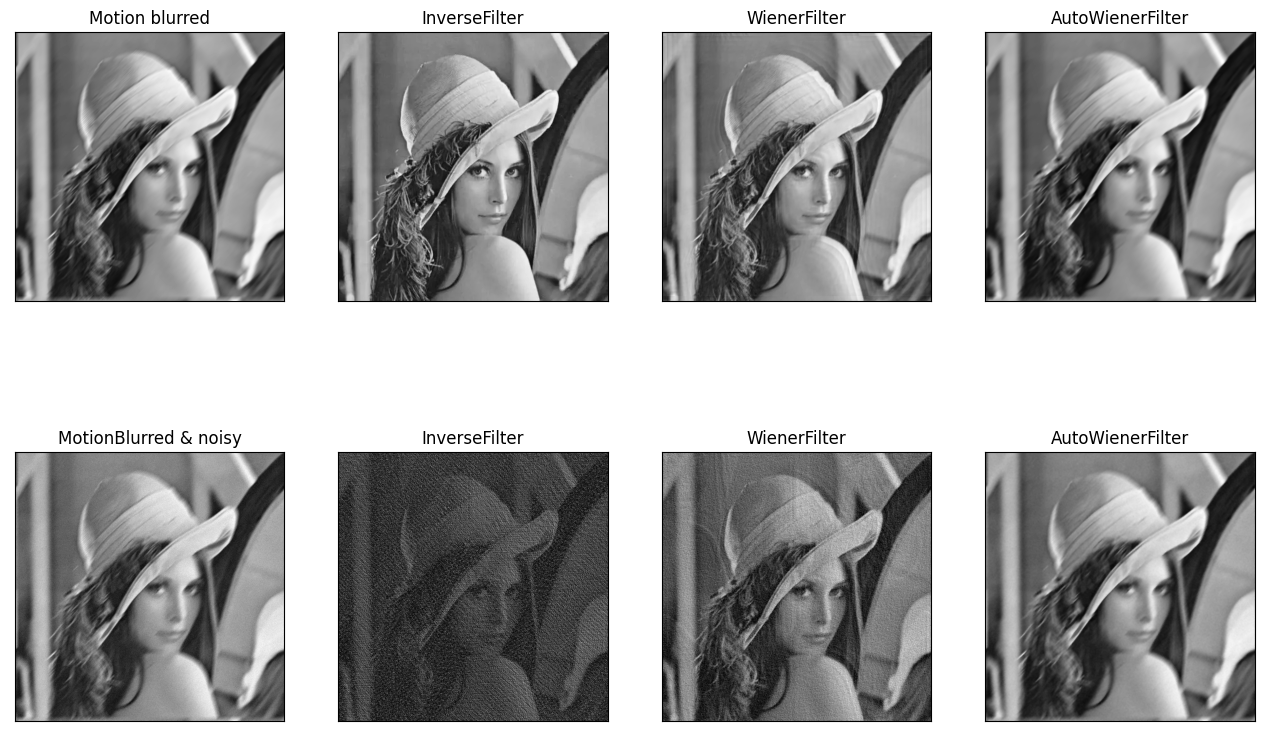

In [36]:
srcImg = cv2.imread('lena.jpg')
srcImg = cv2.cvtColor(srcImg,cv2.COLOR_BGR2GRAY)
h,w=srcImg.shape
#进行运动模糊处理
PSF = motion_process((h,w), 60)
blurred = np.abs(make_blurred(srcImg, PSF, 1e-3))
result_inverse = inverse(blurred, PSF, 1e-3) #逆滤波
result_wiener= _wiener(blurred,PSF,1e-3)  #维纳滤波
result_auto = wiener(blurred)
blurred_noisy=blurred + 0.1 * blurred.std() * \
   np.random.standard_normal(blurred.shape) #添加噪声,standard_normal产生随机的函数
result_inverse_noise = inverse(blurred_noisy, PSF, 0.1+1e-3) #对添加噪声的图像进行逆滤波
result_wiener_noise = _wiener(blurred_noisy,PSF,0.1+1e-3)   #对添加噪声的图像进行维纳滤波
result_auto_noisy = wiener(blurred_noisy)

plt.figure(figsize=(16,10))
plt.gray()
plt.subplot(241),plt.imshow(srcImg)
plt.title("OriginImg"),plt.xticks([]), plt.yticks([])
plt.subplot(241),plt.imshow(blurred)
plt.title("Motion blurred"),plt.xticks([]), plt.yticks([])
plt.subplot(242),plt.imshow(result_inverse)
plt.title("InverseFilter"),plt.xticks([]), plt.yticks([])
plt.subplot(243),plt.imshow(result_wiener)
plt.title("WienerFilter"),plt.xticks([]), plt.yticks([])
plt.subplot(244),plt.imshow(result_auto)
plt.title("AutoWienerFilter"),plt.xticks([]), plt.yticks([])
plt.subplot(245),plt.imshow(blurred_noisy)
plt.title("MotionBlurred & noisy"),plt.xticks([]), plt.yticks([])
plt.subplot(246),plt.imshow(result_inverse_noise)
plt.title("InverseFilter"),plt.xticks([]), plt.yticks([])
plt.subplot(247),plt.imshow(result_wiener_noise)
plt.title("WienerFilter"),plt.xticks([]), plt.yticks([])
plt.subplot(248),plt.imshow(result_auto_noisy)
plt.title("AutoWienerFilter"),plt.xticks([]), plt.yticks([])

